Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("Automobile buying behaviour.csv")

In [ ]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [ ]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99,99,99,99,99,99
mean,36,2,1736364,534343,2270707,1194040
std,6,1,673622,605445,1050777,437696
min,26,0,200000,0,200000,110000
25%,31,2,1300000,0,1550000,800000
50%,36,2,1600000,500000,2100000,1200000
75%,41,3,2200000,900000,2700000,1500000
max,51,4,3800000,2100000,5200000,3000000


|index|Age|No of Dependents|Salary|Wife Salary|Total Salary|Price|
|---|---|---|---|---|---|---|
|count|99\.0|99\.0|99\.0|99\.0|99\.0|99\.0|
|mean|36\.313131313131315|2\.1818181818181817|1736363\.6363636365|534343\.4343434343|2270707\.0707070706|1194040\.4040404041|
|std|6\.2460542069413965|1\.335264525987239|673621\.7289890773|605444\.9563214018|1050777\.4114525316|437695\.54042274354|
|min|26\.0|0\.0|200000\.0|0\.0|200000\.0|110000\.0|
|25%|31\.0|2\.0|1300000\.0|0\.0|1550000\.0|800000\.0|
|50%|36\.0|2\.0|1600000\.0|500000\.0|2100000\.0|1200000\.0|
|75%|41\.0|3\.0|2200000\.0|900000\.0|2700000\.0|1500000\.0|
|max|51\.0|4\.0|3800000\.0|2100000\.0|5200000\.0|3000000\.0|

In [ ]:
df.isna().sum()

,0
Age,0
Profession,0
Marrital Status,0
Education,0
No of Dependents,0
Personal loan,0
House Loan,0
Wife Working,0
Salary,0
Wife Salary,0


In [ ]:
df["Profession"].unique()

array(['Salaried', 'Business'], dtype=object)

In [ ]:
df["Education"].unique()

array(['Post Graduate', 'Graduate'], dtype=object)

In [ ]:
df["Make"].unique()

array(['i20', 'Ciaz', 'Duster', 'City', 'SUV', 'Baleno', 'Verna',
       'Luxuray', 'Creata'], dtype=object)

<Axes: xlabel='Make'>

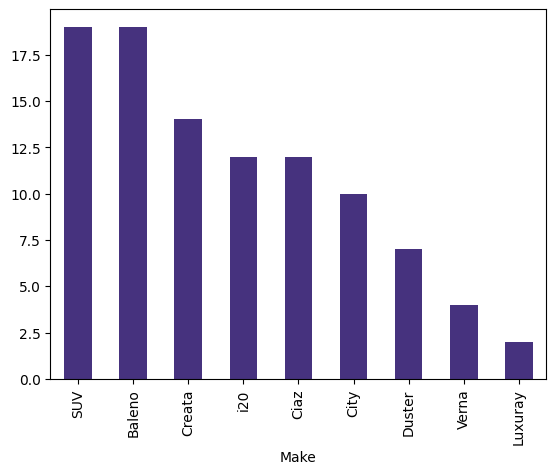

In [ ]:
# Highest selling vehicle is both SUV and Baleno

df["Make"].value_counts().plot(kind = "bar")


In [ ]:
df1 = df[["Marrital Status","Make"]]
marr = df1.loc[df1["Marrital Status"] == "Married"]
unmarr = df1.loc[df1["Marrital Status"] == "Single"]

<Axes: xlabel='Make'>

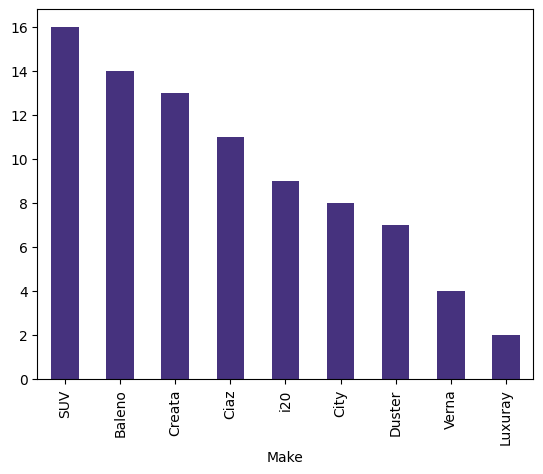

In [ ]:
marr["Make"].value_counts().plot(kind = "bar")

SUV is still popular among married couples whereas Baleno is popular among Singles

<Axes: xlabel='Make'>

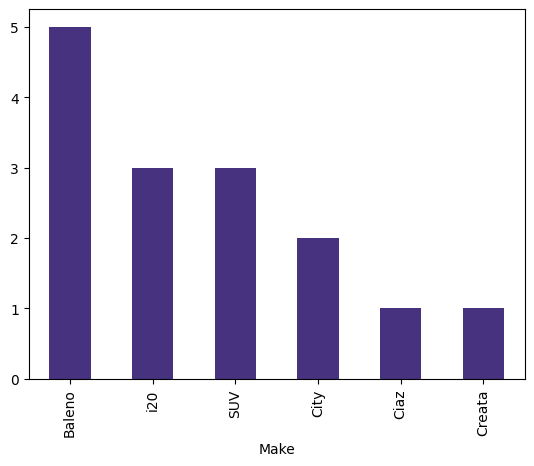

In [ ]:
unmarr["Make"].value_counts().plot(kind = "bar")

<Axes: title={'center': 'Total Salary'}, xlabel='Make'>

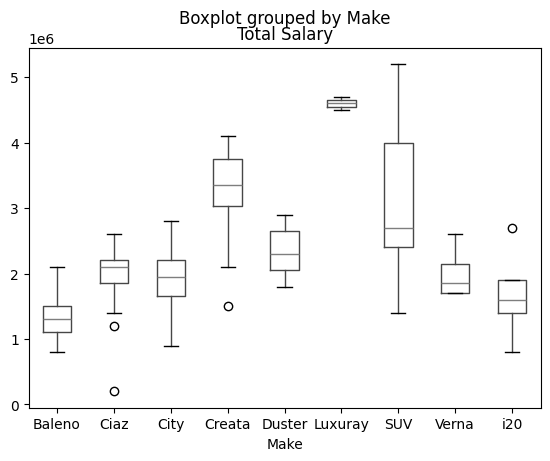

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
df.boxplot(by ='Make', column =['Total Salary'], grid = False)


Here above we see that the SUVs are bought from a longer range of salaries implying the popularity among diverse salary groups

Segmentation using Kmeans Clustering


In [ ]:
df1 = df


In [ ]:
df1['House Loan'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df1['Personal loan'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df1['Education'].replace(to_replace=['Post Graduate','Graduate'],value=[1, 0],inplace=True)
df1['Profession'].replace(to_replace=['Salaried','Business'],value=[0, 1],inplace=True)
df1['Marrital Status'].replace(to_replace=['Single','Married'],value=[0, 1],inplace=True)


In [ ]:
df1.drop("Wife Working",inplace = True,axis = 1)
df1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Salary,Wife Salary,Total Salary,Make,Price
0,27,0,0,1,0,1,0,800000,0,800000,i20,800000
1,35,0,1,1,2,1,1,1400000,600000,2000000,Ciaz,1000000
2,45,1,1,0,4,1,1,1800000,0,1800000,Duster,1200000
3,41,1,1,1,3,0,0,1600000,600000,2200000,City,1200000
4,31,0,1,1,2,1,0,1800000,800000,2600000,SUV,1600000


Building the model

In [ ]:
scaler = StandardScaler()
X = df.drop("Make", axis = 1)
X_scaled = scaler.fit_transform(X)

In [ ]:
import numpy as np

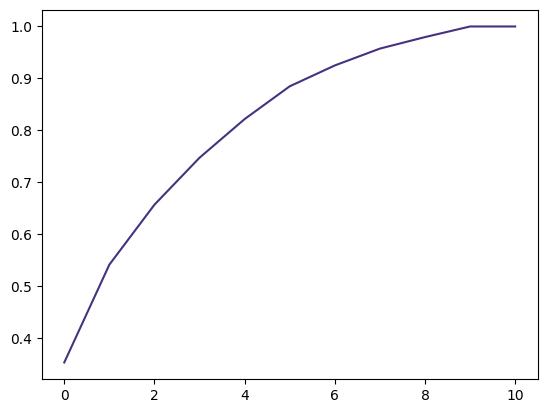

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))


We can see the graph bending after 9 components hence we choose 9 components

In [ ]:
pca = PCA(n_components = 9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame (X_pca, columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-4,-1,-2,0,1,0,1,-1,0
1,-0,1,-1,0,-1,1,0,-0,0
2,0,3,1,-1,1,-0,1,0,1
3,0,-0,1,1,0,0,0,-0,0
4,0,-0,-1,0,-0,1,1,-1,-0


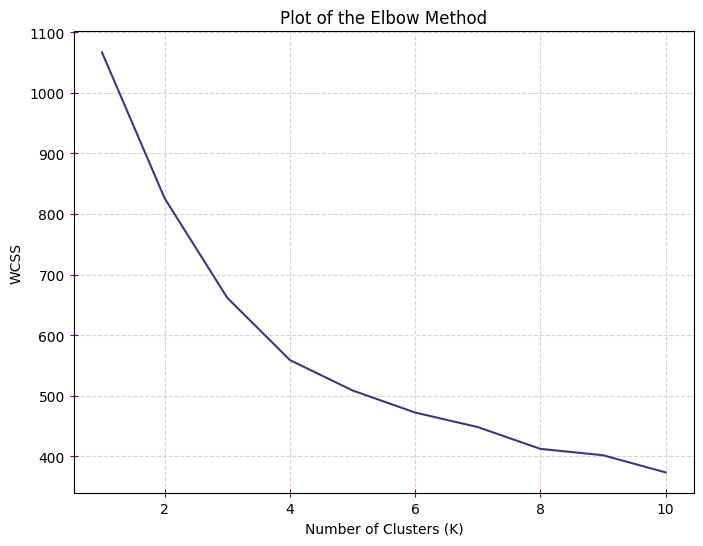

In [ ]:
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=123)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method')
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

Optimal number of clusters = 4

In [ ]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=123)
kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=123)

In [ ]:
pd.Series(kmean.labels_).value_counts()

,count
2,39
1,21
0,20
3,19


In [ ]:
df1['clusters'] = kmean.labels_

The first two principal components captured the most variance hence we can see the maximum cluster separation


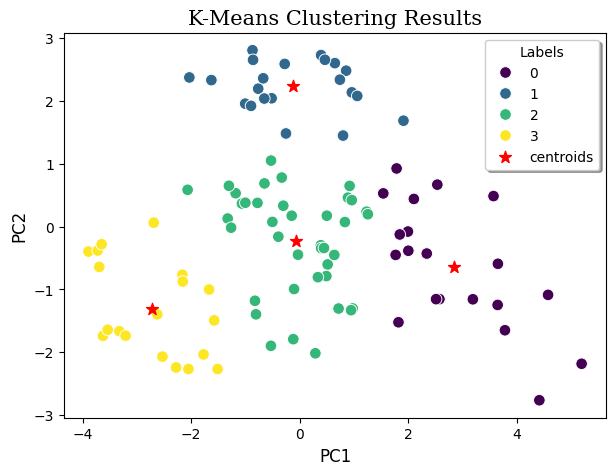

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', s=70, hue=kmean.labels_, palette='viridis')
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', size=12)
plt.ylabel('PC2', size=12)
plt.legend(title='Labels', shadow = True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

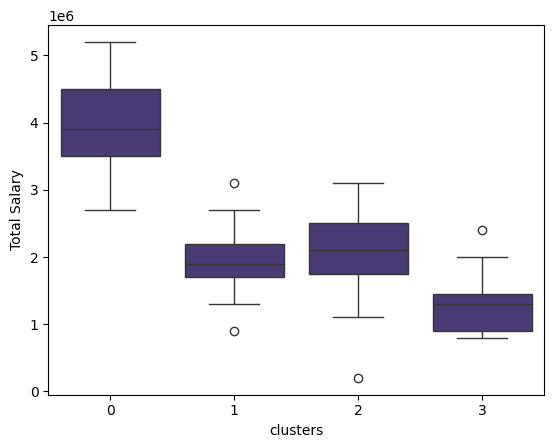

In [ ]:

sns.boxplot(x="clusters", y="Total Salary", data=df1);


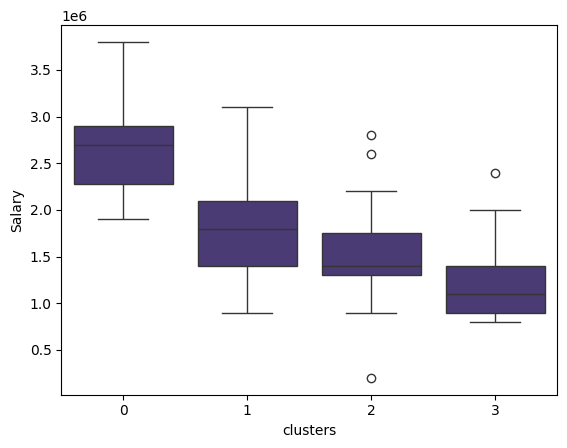

In [ ]:
sns.boxplot(x="clusters", y="Salary", data=df1);

Segment 1 has a wider range income  and it consists mostly of salaried men hence the vehicles can have extra offers

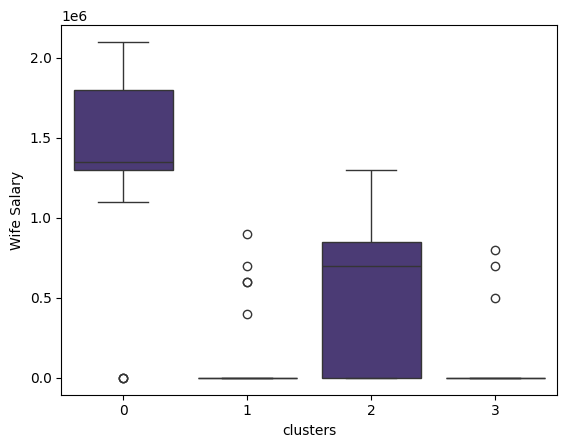

In [ ]:
sns.boxplot(x="clusters", y="Wife Salary", data=df1);

Segment 0 and 2 customers consists of salaried women

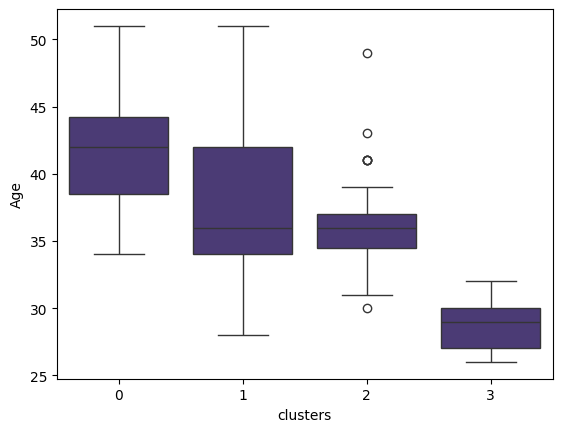

In [ ]:
sns.boxplot(x="clusters", y="Age", data=df1);

Segment 1 customers and their bought product taste is familiar among a wide range of age group

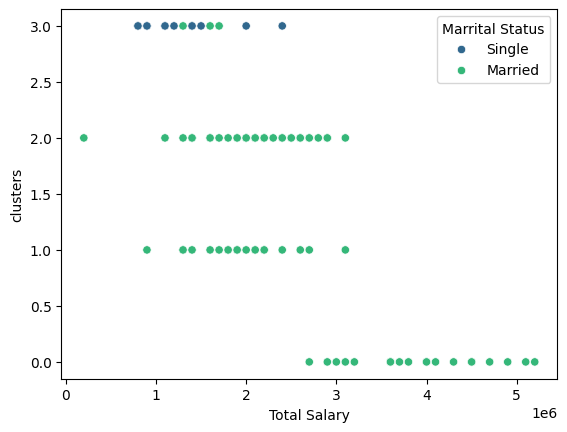

In [ ]:
df = pd.read_csv("Automobile buying behaviour.csv")
df["clusters"] = df1["clusters"]
g = sns.scatterplot(x="Total Salary",
                    y="clusters",
                    hue="Marrital Status",
                    data=df,palette = "viridis")

Segment 3 consists of single individuals

Given More time, Gaussian Mixture model can be applied to the clustering algorithm
This algoritm is computationally expensive but it comes with its benefits

Unlike K-means, which assumes spherical clusters, GMM can model elliptical clusters. This means it can work with data where customer segments have more complex shapes.
Probabilistic Assignments:

GMM provides the probability of a data point belonging to each cluster, allowing for soft assignments rather than hard assignments like in K-means. This helps if customers belong to more than one segment to some degree, which is often true in real-world markets.

GMM can accommodate clusters with different sizes and variances, making it more robust to varying segment sizes and densities compared to K-means, which assumes equal-sized clusters.
Cluster Interpretability:


Vehicle Market Size for this domain will be around 1.8 million later in this year

For optimal market segments, The best features to consider are Total Salary ,Price of the Vehicle  , No of Seats and No of dependents

These features helps to identify the needs of the customer, this will form the basis for segmentation